# Investigating Fandango Movie Ratings - Are They Still a Sham?
## Introduction
You probably already didn't trust movie rating sites, right? That's common in 2018. But in October 2015, Walt Hickey from FiveThirtyEight published a popular article in which he presented strong evidence that Fandango was clearly being biased and dishonest. Fandango has since said that this was due to a bug and the problem was fixed.

Hickey collected data from Fandango's HTML and compared it to the dispalyed ratings, and Fandango has since removed the ability to see the ratings in HTML. Hmmm. In this project we see if they actually fixed the movie rating discrepency, or simply just shoved things under the rug.

## Understanding the Data
An easy way (and a good way) to figure this out is to use Hickey's analysis and compare it to a subset of movie ratings (all sites) after Fandango's announcment. Here, we use a file of movie ratings from 2016-2017 on their site. Both of these data sources are available on github. We explore these datasets here:

In [1]:
import pandas as pd
pd.options.display.max_columns = 100  # This avoids having displays truncated in output
before = pd.read_csv('fandango_score_comparison.csv')  # we get these from the csv files within the folder
after = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


We have all the columns now, but select only the ones that make sense to our analysis. Note: It is important to make copies to avoid any SettingWithCopyWarning as we go on.

In [4]:
fandango_before = before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()  # avoids SettingWithCopyWarnings
fandango_after = after[['movie', 'year', 'fandango']].copy()

In [5]:
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [6]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


The goal is to determine whether or not there has been any change in Fandango's ratings after Hickey's analysis. Using this goal, the popular of it for our analysis would be all ratings on Fandango's website, regardless of year.

From this population, we create two samples - one from before Hickey's analysis, and one from after - and compare these two separate states.

Our two datasets are indeed samples of of these two states that we want, but we need to make sure that they actually describe and are representative of the population, otherwise we will have a large sampling error, and ultimately, the wrong conclusions. 

From Hickey's article and repo on Github, we see that this was the criteria for his sampling:
* The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
* The movie must have had tickets on sale in 2015.

This sampling creates some concern because it is clearly not random. Not every movie had the same chance to be included (some didn't have a chance at all), and this raises some questions of validity. It seems like movies that are most likely to be included in this sample are ones that would be especially good or especially bad (ones that fans actually take the time to rate) - something that we call temporal trends.

Turning to the sampling conditions in the other dataset (taken from the DQ Github), we see that this was the criteria for sampling:
* The movie must have been released in 2016 or later.
* The movie must have had a considerable number of votes and reviews (unclear how many).

Just like Hickey's criteria, this sample would also be subject to temporal trends and unlikely to be representative of the whole population.

It seems like both Hickey and DQ used their sampling to fit onto a certain research question that they had in mind - something we call purposive sampling. This creates clouded judgement, and biased results in some cases. While these samples were 'good enough' for their own questions, it doesn't really help with answering ours. Oops! Looks like we're set back.

## Changing the Approach
At this point, wehave two options. One is to start from scratch and collect new data. Two is to change the goal of our analysis a little bit by making some adustments to the current data and putting some limitations on it. 

In general, option two is usually the way to go. Trying to find the perfect data source is only going to break your back most times, and abandoning all of your work thus far is only a waste of time! In a few rare cases it is necessary, but in our case, changing the approach works better. It will be next to impossible to find another reliable data source about Fandango's ratings before Hickey's analysis anyway, as it is not like there is an archive somewhere.

Instead of trying to determine whether there has been any change in Fandango's system after Hickey's analysis, the new goal will be, after some 'limitations', to determine whether there has been any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. While not completely representing Fandango's entire population, it is a good proxy.

## "Creating" New Samples
With our new goal, we have two populations:
* All Fandango's ratings for popular movies released in 2015.
* All Fandango's ratings for popular movies released in 2016.

But what is 'popular'? No one really knows, so we'll use what Hickey used: a floor of 30 fan ratings will count a movie as being popular. It is important to set this criteria out. 

However, our sample is movies in 2016 does not contain fan ratings! Are they really representative? A quick way to judge this is to just sample 10 movies from the set, and manually check ourselves their fan ratings. A good indicator would be probably 9 out of the 10 movies having over 30 fan ratings. (Note: It is important to say that in no way is this a perfect way to test representativeness. In fact, in a professional research setting this would probably be frowned upon. For the purposes of our research question though, it is more than likely that this would be enough to answer our question.)

In [7]:
fandango_after.sample(10, random_state = 1)  # useful to use random states as described below

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Above we used a value of 1 as the random seed. This is good practice because it suggests that we weren't trying out various random seeds just to get a favorable sample. Actually, read that sentence again because it is very important. 

Now, as of 2018, the fan ratings we found were:
* Mechanic: Resurrection  ---  2247
* Warcraft  ---  7271
* Max Steel  ---  493
* Me Before You  ---  5263
* Fantastic Beasts and Where to Find Them  ---  13400
* Cell  ---  17
* Genius  ---  127
* Sully  ---  11877
* A Hologram for the King  ---  500
* Captain America: Civil War  ---  35057

We see that clearly 9 out of 10 of them, or 90%, fulfill the popular criteria. This is enough to move forward with confidence, as the ones who were popular also broke the 30 rating floor by a LOT too.

We can also double check the other dataset while we're at it. This is quick:

In [8]:
sum(fandango_before["Fandango_votes"] < 30)

0

Now that we validates, we isolate the datasets into ones that can answer our question with confidence. We need to isolate the movies in the year 2015, and 2016, and use these new isolated datasets moving forward. We can get the year from Hickey's analysis by parsing the 'FILM' column.

In [9]:
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [10]:
fandango_before['Year'] = fandango_before['FILM'].str[-5:-1]  # we can get the end of a string in this way
fandango_before['Year'].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: Year, dtype: object

In [11]:
fandango_before['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [12]:
fandango_2015 = fandango_before[fandango_before['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [13]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [14]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distribution Shapes
Wow! After all of that preliminary work, we can finally begin some analysis. Finding data and data mangling are often 70% of the work, which must be noted. You don't want to be getting into something you don't expect! 

Let's finally start the analysis by comparing the higher level data: the shapes of distributions. As an homage to Hickey for providing us with half our data, we can try out matplotlib's fivethirtyeight style for the plots.

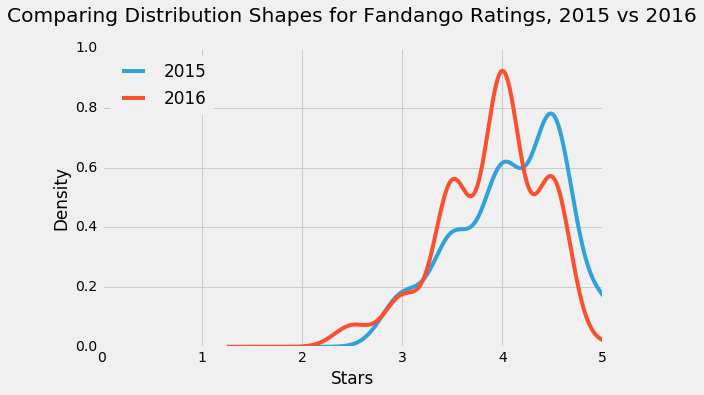

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
# to use inline
plt.style.use('fivethirtyeight')  # declare a style to use

# first make the graph
fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5))  # kernel density plots
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)

# customize the graph
plt.title("Comparing Distribution Shapes for Fandango Ratings, 2015 vs 2016", y = 1.07)  # y is the parameter that pads the title upward
plt.xlabel("Stars")
plt.ylabel("Density")
plt.xlim(0,5)  # 0 to 5 ratings absolute
plt.xticks(np.arange(0,5.15))  # 5.1 to include 5 in the plot showing, else it is cut off a bit
plt.show()

A couple findings:
* Both distributions are strongly left skewed.
* The 2016 distribution is shfited to the left a bit more than the 2015 distribution.

The left skew indicates a bit of bias - after all, a rating system that is truly pure should have a normal distribution - even if every single movie ever made was truly incredible, there HAS to be a worst movie, and that would take the 0 on the scale. Given the fact that Fandango also sells movie tickets for revenue, we could investigate this for conspiracy. However, it is not really relevant to our question, so we keep it on the backburner.

The graph does tell a bit of a tale that is of relevance, however: The shift in the 2016 distribution indicates that popular movies in 2016 were indeed rated slightly lower than popular movies in 2015. While this could be due to a number of factors, including the innocent one of popular movies in 2016 were truly worse than poular movies in 2015, it is a step in the right direction and does give Fandango a little credibility in their claim that they "fixed" their ratings.

## Comparing Relative Frequencies
While the kernel density plots provided a little bit of insight in 2016 popular movies being rated slightly lower, we now have to dig a little bit deeper into some lower level information in relative frequencies. Because the datasets have different counts, we normalize and use percentages for more accuracy:

In [16]:
print('2015' + '\n' + '-' * 16) # To help us distinguish between the two tables immediately and
                                # avoid silly mistakes as we read to and from the data
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [17]:
print('2016' + '\n' + '-' * 16) # To help us distinguish between the two tables immediately and
                                # avoid silly mistakes as we read to and from the data
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

From our tables, we can clearly see to start that ratings of 4.5 and 5.0 were much more frequent in 2015 than 2016, having about 13% and 6% more of all total ratings, respectively. In fact, in 2016, less than 1 percent of all popular movies were rated a 5.0 which is a huge jump from almost 7% in 2015.

The minimum rating was also lower in 2016, with some movies being rated a 2.5, whereas in 2015 a 2.5 did not even exist.

While this very much confirms the left shift that we saw earlier in the kde plot, it is important to not that it is not a complete left shift. Popular movies in 2016 still received more 3.5 and 4.0 ratings than in 2015, which is still a pretty high rating. Although this could just be due to the fact that since the 4.5 and 5.0 movies were rated less, the rating percentages had to go *somewhere*.

## Determining the Direction of the Change
Getting some summary statistics will bring into light more about the direction of change and make things more precise. 

In [18]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()  # make a new dataframe to use in a graph later
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']

In [19]:
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


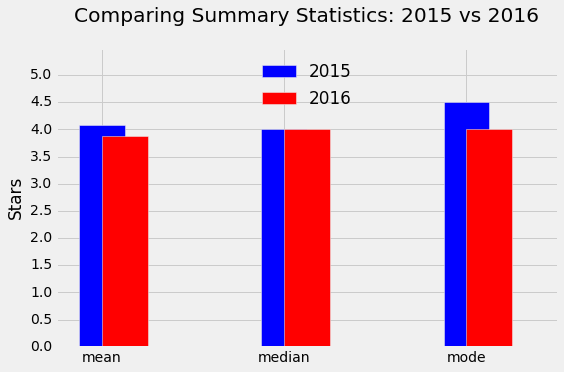

In [20]:
plt.style.use('fivethirtyeight')  # this was already declared globally, but we use it again here just to show
summary['2015'].plot.bar(color = 'Blue', align = 'center', label = '2015', width = .25)  # we can declare colors explicitly like this
summary['2016'].plot.bar(color = 'Red', align = 'edge', label = '2016', width = .25, rot = 0, figsize = (8,5))  # edge will make the graph appear as below

# customize the graph
plt.title('Comparing Summary Statistics: 2015 vs 2016', y = 1.07)
plt.ylabel('Stars')
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.legend(framealpha = 0, loc = 'upper center')  # first parameter implies transparency
plt.show()

We see mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015.

In [21]:
# look at change in mean
mean_drop = (summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]
mean_drop

0.04842683568951993

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

## Further Analysis / Next Steps
## Reproducing FiveThirtyEight Style Graphs
We had a good start by producing our plots in fivethirtyeight style, but what if we wanted to reproduce them almost completely in the style? There are a couple ways to do that, and we reproduce one of them below:

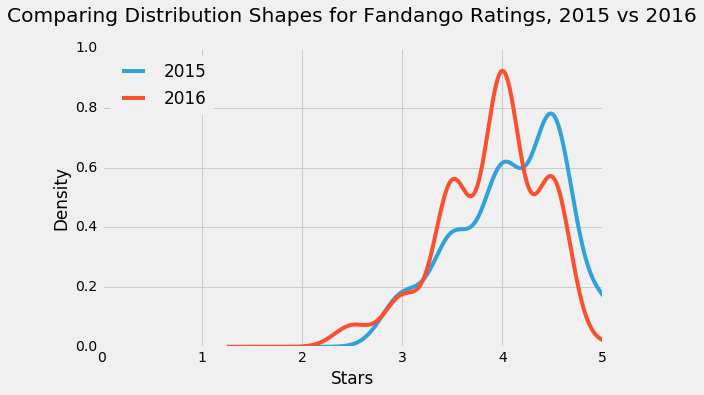

In [22]:
plt.style.use('fivethirtyeight')  # again, we don't need this; was declared globally

# make the graph
fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)

# customize the graph
plt.title("Comparing Distribution Shapes for Fandango Ratings, 2015 vs 2016", y = 1.07)  # y is the parameter that pads the title upward
plt.xlabel("Stars")
plt.ylabel("Density")
plt.xlim(0,5)  # 0 to 5 ratings absolute
plt.xticks(np.arange(0,5.15))  # 5.1 to include 5 in the plot showing, else it is cut off a bit
plt.show()

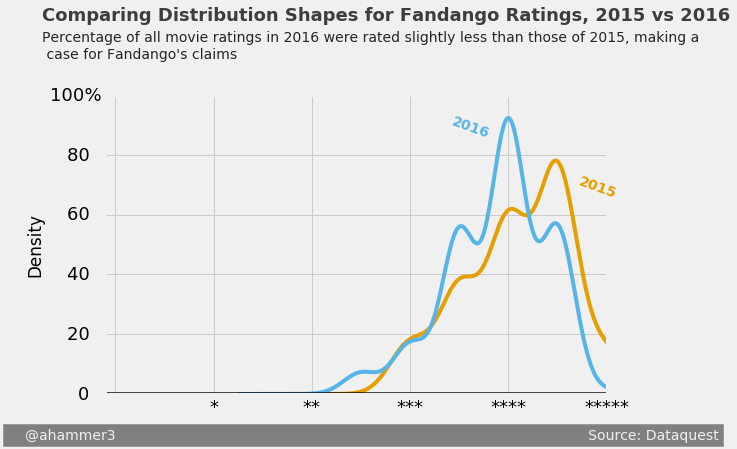

In [23]:
plt.style.use('fivethirtyeight')

# make a colors list
colors = [(230/255,159/255,0), (86/255,180/255,233/255)]

# make the graphs
plot = fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = False, figsize = (8,5), color = colors[0])
plot = fandango_2016['fandango'].plot.kde(label = '2016', legend = False, color = colors[1])

# lots of custimization
plot.text(x = -.75, y = 1.25, s = 'Comparing Distribution Shapes for Fandango Ratings, 2015 vs 2016',
          fontsize = 18, weight = 'bold', alpha = .75)  # weight is for bolding, alpha is transparency
plot.text(x = -.75, y = 1.125, s = 'Percentage of all movie ratings in 2016 were rated slightly less than those of 2015, making a\n case for Fandango\'s claims',
          fontsize = 14, alpha = .85)  # s parameter is always for your text
plt.xlabel("Stars")
plt.ylabel("Density")
plt.xlim(-.1,5)  # start at -.1 to have room for an extra tick line at 0
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)  # major axes ticks
plt.xticks(np.arange(0,5.1))  # 5.1 to include 5 in the plot showing, else it is cut off a bit
plot.set_yticklabels(labels = ['0  ', '20  ', '40  ', '60  ', '80  ', '100%'])  # new labels make it easier to read
plot.set_xticklabels(labels = ['',  '*', '**', '***', '****', '*****'])
plot.axhline(y = 0, color = 'Black', linewidth = 5, alpha = .7)

# signature bar
plot.xaxis.label.set_visible(False)
plot.text(x = -1.1, y = -.15, s = '    @ahammer3                                                                                                         Source: Dataquest',
          fontsize = 14, color = '#f0f0f0', backgroundcolor = 'Grey')  # we can use hex color codes as shown in code

# legend 
plot.text(x = 4.7, y = .7, s = '2015', color = colors[0], weight = 'bold', rotation = -20, backgroundcolor = '#f0f0f0')  # rottate the legend markers as necessary
plot.text(x = 3.4, y = .9, s = '2016', color = colors[1], weight = 'bold', rotation = -20, backgroundcolor = '#f0f0f0')
plt.show()

Wow, what a difference! Can't even tell we're not on the 538 website, can you? All things considered, here is a summary of the changes made in the code to make these things happen:
* added a colors list for colorblind friendly colors
* removed rectangular bulky legend
* removed the .title() method and used .text() for title and subtitle to get full control of x and y coordinates
* adjusted xlim ticks to have a vertical line at the start
* adjusted tick params at the major axes
* set new x and y tick labels for better viewing
* bolded the horizontal 0 line for better viewing
* set x-axis label to false (can keep it true, it doesn't matter) to add the signature bar below graph
* set new legend labels to correspond to each graph next to their respective plots

The graphs were given 'plot' axes variables and the changes were made using plot.() for better viewing in the code. Changes made to existing methods were not changed, however.

We can make the other plot in this project just like this one with a little bit of effort, but hopefully this sheds some light on the fact that you really don't have to be a professional to produce professional-looking graphs.

## Stylistical Improvement: Code Comments
Commenting is important! In our previous projects, we just left the code as is, but it is important to note that sometimes our audience might not be as technical, or even if they are, might not understand a little bit of what we are trying to do in the code. Syntax is necessary, but semantics are a blessing.

*Comment as much as possible without stating the obvious or being redundant*

In addition to the code, the whole project itself must be communicated to the audience, so it is important to remember these major parts:
* Title
* Introduction
* Subheadings
* Conclusion
* Graphs
* Code

Making these individual parts clear will in turn make the project as a whole clear, and much more readible. The text itself should focus on these things:
* Readability
* The depth and clarity of your explanations
* The flow of the ideas you're writing about
* The connection between narrative and code

At the current rendition of this project, the code/text is not commented well. In future editions, these things could be improved on and better displayed to the viewer. 

NOTE: TODO - improve syntax - COMPLETED - as of this edition everything above this cell is commented and styled to meet 'guidelines'.

In [24]:
# change when done

commented = True  
# commented = False
commented

True

## Should I Use Fandango?
Throughout this project, we seem to have been very critical of Fandango, but it turns out they might have actually been truthful and fixed (at least somewhat) their rankings from 2015 to 2016. That begs the question though - should you still even use them? We look again at their kde for popular movies:

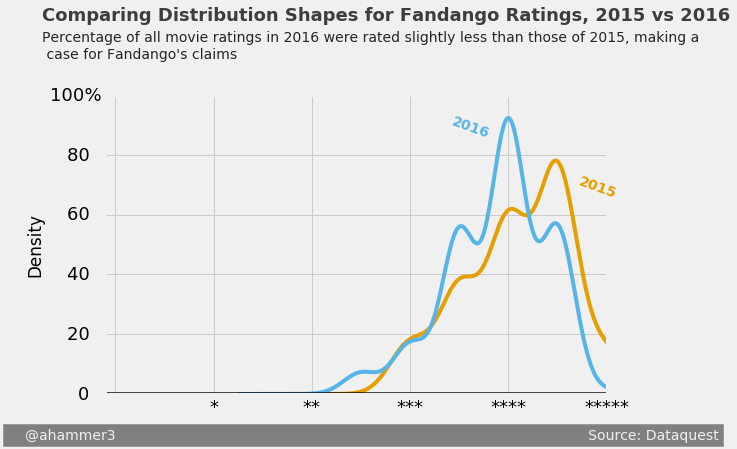

In [25]:
# make a colors list
colors = [(230/255,159/255,0), (86/255,180/255,233/255)]

# make the graphs
plot = fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = False, figsize = (8,5), color = colors[0])
plot = fandango_2016['fandango'].plot.kde(label = '2016', legend = False, color = colors[1])

# lots of custimization
plot.text(x = -.75, y = 1.25, s = 'Comparing Distribution Shapes for Fandango Ratings, 2015 vs 2016',
          fontsize = 18, weight = 'bold', alpha = .75)  # weight is for bolding, alpha is transparency
plot.text(x = -.75, y = 1.125, s = 'Percentage of all movie ratings in 2016 were rated slightly less than those of 2015, making a\n case for Fandango\'s claims',
          fontsize = 14, alpha = .85)  # s parameter is always for your text
plt.xlabel("Stars")
plt.ylabel("Density")
plt.xlim(-.1,5)  # start at -.1 to have room for an extra tick line at 0
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)  # major axes ticks
plt.xticks(np.arange(0,5.1))  # 5.1 to include 5 in the plot showing, else it is cut off a bit
plot.set_yticklabels(labels = ['0  ', '20  ', '40  ', '60  ', '80  ', '100%'])  # new labels make it easier to read
plot.set_xticklabels(labels = ['',  '*', '**', '***', '****', '*****'])
plot.axhline(y = 0, color = 'Black', linewidth = 5, alpha = .7)

# signature bar
plot.xaxis.label.set_visible(False)
plot.text(x = -1.1, y = -.15, s = '    @ahammer3                                                                                                         Source: Dataquest',
          fontsize = 14, color = '#f0f0f0', backgroundcolor = 'Grey')  # we can use hex color codes as shown in code

# legend 
plot.text(x = 4.7, y = .7, s = '2015', color = colors[0], weight = 'bold', rotation = -20, backgroundcolor = '#f0f0f0')  # rotate the legend markers as necessary
plot.text(x = 3.4, y = .9, s = '2016', color = colors[1], weight = 'bold', rotation = -20, backgroundcolor = '#f0f0f0')
plt.show()

Yes, this is a very simple plot at the end of the day, but the glaring detail here is still the fact that even with the improvement, both plots are painfully left skewed. We want an unbiased movie ratings source, and with Fandango completely neglecting the ratings of 0.0, 0.5, 1.0, etc., although they did improve, for the time being, at least as of 2016, you should not be using them as a source for ratings.

We want a normal distribution in any (ok, most) ratings systems in order to be fair. There are dozens of movie rating sites out there, and to be honest, any of them would probably be better than Fandango, as you can't really get any more left skewed than this (to be fair, they are affected a lot by the fact that they also have to sell tickets for revenue).

This article touches on this more, and we could also look at ratings from sites not mentioned in the article in our own project in the future if we wish. The TLDR, though, is that a site like Metacritic is much more reliable than Fandango in terms of movie ratings.

https://medium.freecodecamp.org/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19

## A Quick Proof
To practice some web scraping, we've done a little work below for IMBD and metascore ratings which will all but prove that Fandango, even in 2018, is not to be trusted. First let's just scrape one page, and then multiple pages to see the difference. This can be used for future reference (at least for me).

In [26]:
from requests import get

url = 'http://www.imdb.com/search/title?release_date=2018&sort=num_votes,desc&page=1'

response = get(url)
print(response.text[:500])



<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle",


In [27]:
from bs4 import BeautifulSoup

html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [28]:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


In [29]:
first_movie = movie_containers[0]
first_movie

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt4154756"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt4154756/?ref_=adv_li_i"> <img alt="Avengers: Infinity War" class="loadlate" data-tconst="tt4154756" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMjMxNjY2MDU1OV5BMl5BanBnXkFtZTgwNzY1MTUwNTM@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB470041630_.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt4154756/?ref_=adv_li_tt">Avengers: Infinity War</a>
<span class="lister-item-year text-muted unbold">(2018)</span>
</h3>
<p class="text-muted ">
<span class="certificate">PG-13</span>
<span class="ghost">|</span>
<span class="runtime">149 min</span>
<span class="ghos

In [30]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Extract data from individual movie container
for container in movie_containers:

    # If the movie has Metascore, then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:

        # The name
        name = container.h3.a.text
        names.append(name)

        # The year
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)

        # The IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)

        # The Metascore
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))

        # The number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

In [31]:
# make a df
imbd = pd.DataFrame({'movie': names,
                       'year': years,
                       'imdb': imdb_ratings,
                       'metascore': metascores,
                       'votes': votes})

In [ ]:
imbd

Success! Now onto multiple pages, which will require a bit more work, and a few more functions, but in the end, we should get what we need:

Note: pass this headers in for when english needs to be translated in parsing maybe other websites - headers = {"Accept-Language": "en-US, en;q=0.5"}

In [33]:
# prepare some loops
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2001,2019)]
headers = {"Accept-Language": "en-US, en;q=0.5"}

In [34]:
# to control the crawl rate and monitor the loop
from time import sleep
from random import randint
from time import time
from IPython.core.display import clear_output
from warnings import warn

In [ ]:
# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every year in the interval 2001-2018
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:

        # Make a get request
        response = get('http://www.imdb.com/search/title?release_date=' + year_url + 
        '&sort=num_votes,desc&page=' + page, headers = headers)

        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break the loop if the number of requests is greater than expected
        if requests > 72:
            warn('Number of requests was greater than expected.')  
            break 

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year 
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

Request:72; Frequency: 0.08001689856625621 requests/s


Note that this script takes about 15-20 minutes to run. Data isn't lightspeed!
To know when to continue: Requests should end at 72 with no errors.

In [37]:
movie_ratings = pd.DataFrame({'movie': names,
                              'year': years,
                              'imdb': imdb_ratings,
                              'metascore': metascores,
                              'votes': votes})
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3284 entries, 0 to 3283
Data columns (total 5 columns):
imdb         3284 non-null float64
metascore    3284 non-null int64
movie        3284 non-null object
votes        3284 non-null int64
year         3284 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 128.4+ KB
None


,imdb,metascore,movie,votes,year
0,8.8,92,The Lord of the Rings: The Fellowship of the Ring,1456431,(2001)
1,8.2,72,A Beautiful Mind,745073,(2001)
2,8.1,78,"Monsters, Inc.",712553,(2001)
3,8.1,88,Donnie Darko,681140,(2001)
4,8.3,69,Amélie,633316,(2001)
5,7.6,64,Harry Potter and the Sorcerer's Stone,547172,(2001)
6,7.9,84,Shrek,541542,(2001)
7,8.6,96,Spirited Away,532765,(2001)
8,7.8,74,Ocean's Eleven,462974,(2001)
9,7.7,69,Training Day,347742,(2001)


Looks like we got what we needed! Now time to do a bit of cleanup:

In [38]:
# redo columns
movie_ratings = movie_ratings[['movie', 'year', 'imdb', 'metascore', 'votes']]
movie_ratings.head()

,movie,year,imdb,metascore,votes
0,The Lord of the Rings: The Fellowship of the Ring,(2001),8.8,92,1456431
1,A Beautiful Mind,(2001),8.2,72,745073
2,"Monsters, Inc.",(2001),8.1,78,712553
3,Donnie Darko,(2001),8.1,88,681140
4,Amélie,(2001),8.3,69,633316


In [42]:
# look at the years
movie_ratings['year'].unique()

array(['(2001)', '(2002)', '(2003)', '(2004)', '(I) (2004)', '(2005)',
       '(I) (2005)', '(2006)', '(I) (2006)', '(2007)', '(I) (2007)',
       '(2008)', '(I) (2008)', '(2009)', '(I) (2009)', '(2010)',
       '(I) (2010)', '(2011)', '(I) (2011)', '(2012)', '(I) (2012)',
       '(III)', '(2013)', '(I) (2013)', '(2014)', '(I) (2014)',
       '(II) (2014)', '(2015)', '(I) (2015)', '(II) (2015)', '(2016)',
       '(II) (2016)', '(I) (2016)', '(IX) (2016)', '(2017)', '(I) (2017)',
       '(2018)', '(I) (2018)', '(III) (2018)'], dtype=object)

In [43]:
# convert to int
# remove the weird III value first
movie_ratings = movie_ratings[movie_ratings['year'] != '(III)']
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)

In [44]:
# confirm the change
movie_ratings['year'].head()

0    2001
1    2001
2    2001
3    2001
4    2001
Name: year, dtype: int64

In [45]:
# look for outliers (there are none)
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]

,imdb,metascore
min,4.1,24.0
max,9.0,100.0


In [51]:
# normalize imdb ratings
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head()

,movie,year,imdb,metascore,votes,n_imdb
0,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,92,1456431,88.0
1,A Beautiful Mind,2001,8.2,72,745073,82.0
2,"Monsters, Inc.",2001,8.1,78,712553,81.0
3,Donnie Darko,2001,8.1,88,681140,81.0
4,Amélie,2001,8.3,69,633316,83.0


In [52]:
# save the df to a csv
movie_ratings.to_csv('movie_ratings.csv')

This last step is very important! Unless you want to go through 15-20 min of scraping again, saving the file to a csv makes things much quicker next time. All you have to do then is just read it into pandas and voila.

In [53]:
# Run this cell next time only if you have the csv
# movie_ratings = pd.read_csv('movie_ratings.csv')
# movie_ratings.head()

Finally, let's plot some distributions to prove a point:

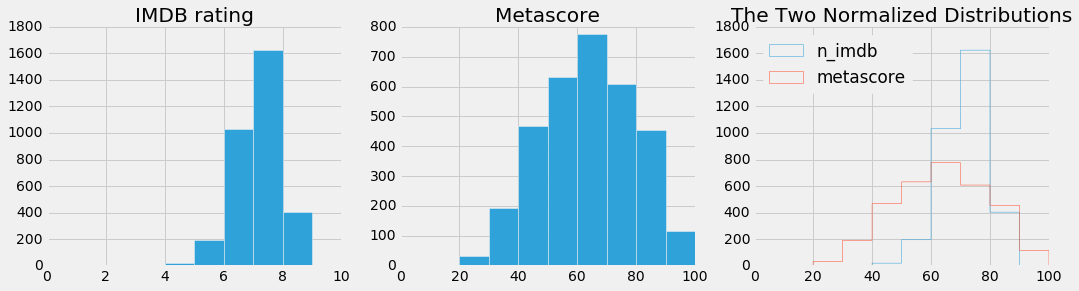

In [54]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes

ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')

ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')

ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

Well would you look at that. It turns out this wasn't a very quick proof after all, but we still got what we came for. We can see that IMDB ratings actually skew heavily to the left just like Fandango, so they may be just as unreliable. However, the metascores follow and almost perfect normal distribution. While their mean isn't exactly 50, the shape of their distribution is good enough such that we can confidently say that their ratings are probably more trustworthy than that of Fandango.

## Conclusion
While we went off topic just a little bit with that last question, our analysis showed that there was indeed a difference in Fandango's ratings from 2015 to 2016 in terms of popular movies. We determined that this difference was that popular movies in 2016 were rated less in score than in 2015, which may give some positive light on Fandango and their claims of changing their 'bug'.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis. It is important to note that we do not confirm this with 100% certainty. 

We then styled our project just a little bit better with 538 style graphs and better commenting, to the best of our ability thus far. We probably could have styled the last graph in our little proof too, but the question was seen and answered quite easily, and the goal of it in the first place was to see web scraping (and let's be honest, just a tiny hint of laziness). 

In order to change the graphs though, it should not take much time at all. Simply copy paste the code from our rendition of the first grpah and change this one as necessary. Trial and error until it looks more beautiful.

Finally, as just mentioned, we did a little web scraping and introduced some new functions to use in order to see a different company/site's movie ratings, and determined that if you are looking for a reliable movie rating source, metascores on IMDB are way better to go to than Fandango (sorry, Fandango). Don't feel too bad for Fandango though, they probably know what they're doing.

After this extensive project, next steps and other questions to answer could probably include things like which year had the best movies, which site is the worst at movie ratings (don't be surprised if it's Fandango all along), are critics better at rating movies than fans (would actually like to see this distribution using rotten tomatoes for example), etc. 

For now, though, it seems as if we have 